<a href="https://colab.research.google.com/github/Hugo-Andres/Data-Analytics-Science/blob/main/Reglas_Asociacion_Ejemplo_Enfermedad_2023_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El  objetivo de las reglas de asociacion es encontrar relaciones dentro un conjunto de transacciones (ítems o atributos) que tienden a ocurrir de forma conjunto.
En este dataset, llamado 'pacientes' lo que buscamos es encontrar las relaciones entre antecedentes (condicion médica) y consecuente (Enfermedad).
Esto es un experimento, no son datos reales.
**El archivo fue descargado del perfil de github 'https://github.com/rociochavezmx/Rocio-Chavez-youtube-Files'.** 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from google.colab import files

In [ ]:
files.upload()

In [ ]:
data = pd.read_csv("Pacientes2.csv")
data

,NOEXPED,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
0,1,NO,0,0,1,0,0,38,0,0,0,0
1,2,SI,0,1,1,1,1,49,1,0,0,0
2,3,SI,1,1,0,1,1,59,1,0,0,1
3,4,NO,1,1,0,0,0,44,0,0,0,0
4,5,NO,0,0,1,0,0,42,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
980,890,SI,1,1,1,0,0,70,1,0,0,0
981,892,NO,0,0,0,0,0,39,0,0,0,0
982,904,NO,1,0,1,1,0,45,0,0,1,0
983,954,NO,1,0,1,0,0,41,0,0,1,0


In [ ]:
data.columns

Index(['NOEXPED', 'Enfermedad', 'HIPERTEN', 'HIPERGLU', 'HDLBAJA', 'HIPERTRI',
       'CINTALTA', 'EDAD', 'GENERO', 'FUMA', 'ALCOHOL', 'POLIURIA'],
      dtype='object')

In [ ]:
data.describe()

,NOEXPED,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,496.428426,0.210152,0.257868,0.563452,0.308629,0.515736,43.393909,0.344162,0.234518,0.241624,0.036548
std,286.746133,0.407624,0.437683,0.496209,0.462162,0.500006,12.193859,0.475336,0.423912,0.428285,0.187745
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000
25%,249.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000
50%,496.000000,0.000000,0.000000,1.000000,0.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000
75%,744.000000,0.000000,1.000000,1.000000,1.000000,1.000000,50.000000,1.000000,0.000000,0.000000,0.000000
max,993.000000,1.000000,1.000000,1.000000,1.000000,1.000000,79.000000,1.000000,1.000000,1.000000,1.000000


data.info()

In [ ]:
#Hacemos una copia del modelo
data1 = data.copy()

In [ ]:
#Preparamos el dataset para el modelo
#Edad vamos a cambiar por 1 y 0. 0 abajo de la media y 1 arriba de la media
#Enfermedad vamos a cambiar NO, SI por 0 y 1 respectivamente.
#Eliminamos columna con numero de expediente
data1['EDAD'] = np.where(data1['EDAD'] < data1['EDAD'].mean(), 0, 1)
data1['Enfermedad'].replace(['NO', 'SI'],[0, 1], inplace=True)
data1.drop('NOEXPED', axis=1, inplace=True)

In [ ]:
data1.head(10)

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,0,0,0
2,1,1,1,0,1,1,1,1,0,0,1
3,0,1,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,0,0,0,0
6,1,1,1,1,0,1,1,1,0,0,0
7,0,0,0,1,0,1,1,0,1,0,0
8,1,1,1,1,1,1,1,0,0,0,0
9,1,0,0,1,1,1,0,1,0,1,0


Enfermedad
NO    689
SI    296
dtype: int64


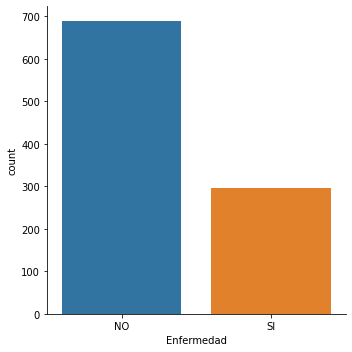

In [ ]:
# miramos si hay balance de clase a predecir
sns.catplot(x='Enfermedad', data = data1, kind = 'count')
print(data1.groupby('Enfermedad').size())     


In [ ]:
#Vamos al modelo de reglas de asociacion con algoritmo apriori
#Tenemos que hacer que busquen asociaciones que coincidan con la presencia de la Enfermedad
#Enfermedad sera el consecuente
#Calculamos todas las asociaciones presentes
Enfermedad = data1.loc[data1['Enfermedad']==1]
print(Enfermedad.shape)

(296, 11)


In [ ]:
#Usamos el algoritmo apriori
frequent_items= apriori(Enfermedad, min_support=0.5, use_colnames=True)
print(frequent_items.shape)
print(frequent_items.head())

(25, 2)
    support      itemsets
0  1.000000  (Enfermedad)
1  0.564189    (HIPERGLU)
2  0.827703     (HDLBAJA)
3  0.658784    (HIPERTRI)
4  0.915541    (CINTALTA)


In [ ]:
#Ahora usamos las reglas de asociacion
reglas= association_rules(frequent_items, metric="confidence")
print(reglas.head(10))
print(reglas.tail(10))
print(reglas.shape)

    antecedents   consequents  antecedent support  consequent support  \
0    (HIPERGLU)  (Enfermedad)            0.564189            1.000000   
1  (Enfermedad)     (HDLBAJA)            1.000000            0.827703   
2     (HDLBAJA)  (Enfermedad)            0.827703            1.000000   
3    (HIPERTRI)  (Enfermedad)            0.658784            1.000000   
4  (Enfermedad)    (CINTALTA)            1.000000            0.915541   
5    (CINTALTA)  (Enfermedad)            0.915541            1.000000   
6        (EDAD)  (Enfermedad)            0.739865            1.000000   
7    (HIPERGLU)    (CINTALTA)            0.564189            0.915541   
8    (HIPERTRI)     (HDLBAJA)            0.658784            0.827703   
9    (CINTALTA)     (HDLBAJA)            0.915541            0.827703   

    support  confidence      lift  leverage  conviction  
0  0.564189    1.000000  1.000000  0.000000         inf  
1  0.827703    0.827703  1.000000  0.000000    1.000000  
2  0.827703    1.00000

 El soporte es simplemente el número de transacciones que incluyen todos los elementos en las partes antecedente y consecuente de la regla .
 Elevación, apalancamiento y convicción son tres de las medidas de interés más conocidas para reglas de asociación nítidas . Todos ellos se basan en una comparación del soporte observado y el soporte que se espera si la parte antecedente y consecuente de la regla fueran estocásticamente independientes.

In [ ]:
print('TODAS LAS ASOCIACIONES ENCONTRADAS')
print(reglas.sort_values(['support'], ascending=False).reset_index(drop=True))

TODAS LAS ASOCIACIONES ENCONTRADAS
                     antecedents             consequents  antecedent support  \
0                   (Enfermedad)              (CINTALTA)            1.000000   
1                     (CINTALTA)            (Enfermedad)            0.915541   
2                      (HDLBAJA)            (Enfermedad)            0.827703   
3                   (Enfermedad)               (HDLBAJA)            1.000000   
4         (Enfermedad, CINTALTA)               (HDLBAJA)            0.915541   
5                      (HDLBAJA)              (CINTALTA)            0.827703   
6                     (CINTALTA)   (Enfermedad, HDLBAJA)            0.915541   
7            (CINTALTA, HDLBAJA)            (Enfermedad)            0.753378   
8          (Enfermedad, HDLBAJA)              (CINTALTA)            0.827703   
9                      (HDLBAJA)  (Enfermedad, CINTALTA)            0.827703   
10                    (CINTALTA)               (HDLBAJA)            0.915541   
11   